<a href="https://colab.research.google.com/github/sssylvia0/Uplift_Model/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Lift model

模型架構圖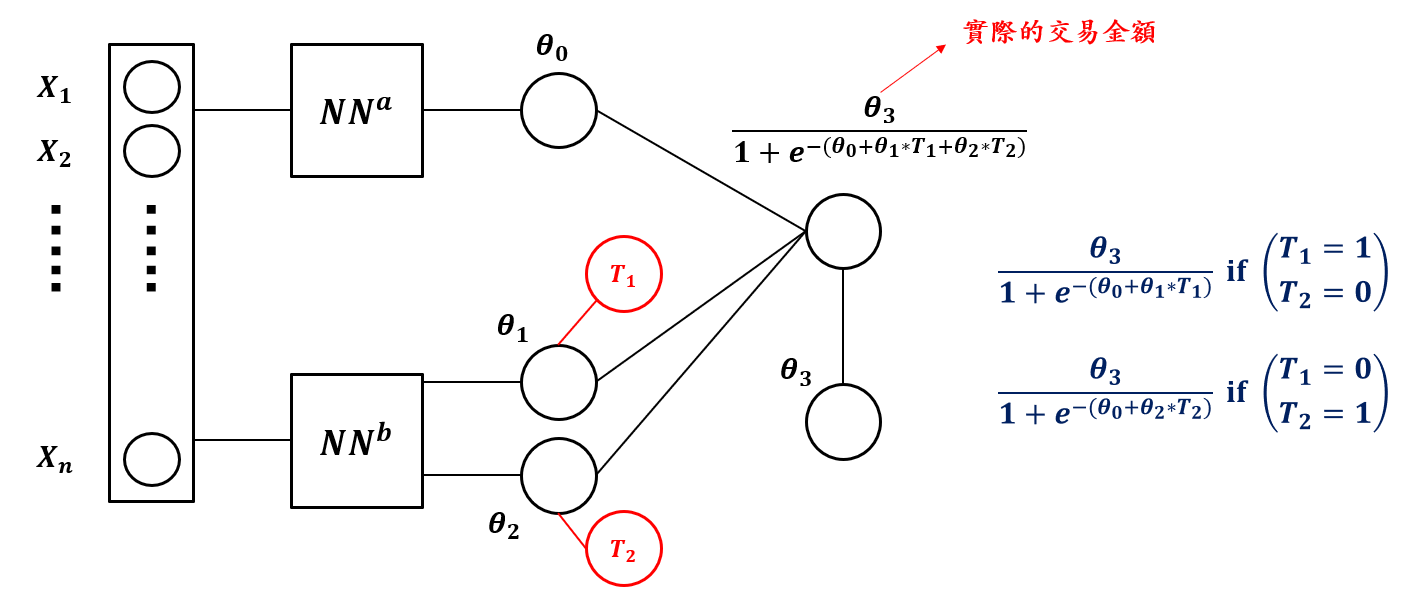

In [7]:
import zipfile

# Specify the path to the zip file
#zip_file_path = 'data202305.csv.zip'
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202401.csv.zip'


# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#df = pd.read_csv('/content/drive/MyDrive/Sinopac/train_202402.csv')
df = pd.read_csv('/content/data202311.csv', index_col = 0)
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,19039293TA8,59,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
1,19042120PA8,54,0,1.0,0,0.0,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0
2,19052324OK8,60,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
3,19052578MU0,60,0,1.0,0,1000.0,1,0,0,3,...,0,0,0,0,0,1,0,1,0,0
4,19079774PA8,60,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066141,Z2229999030,80,0,2.0,0,0.0,1,2,0,3,...,0,0,0,1,0,0,0,0,0,0
1066142,Z2422221010,47,0,2.0,0,1440.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
1066143,Z2422273090,57,0,2.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,1
1066144,Z2794749990,55,0,2.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0


In [45]:
set(col1)-set(col)

{'客戶分層_沉睡戶', '客戶分層_潛力戶', '證券近六個月交易額'}

In [17]:
df.select_dtypes(include=['object']).columns

Index(['UNINO'], dtype='object')

In [18]:
binary_columns = []

for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) <= 2 and (0 in unique_values or 1 in unique_values):
        binary_columns.append(column)

print("Columns with binary values:")
print(binary_columns)
print(len(binary_columns)) #69

# Convert columns to object data type
df[binary_columns] = df[binary_columns].astype('int64')

Columns with binary values:
['公司戶記號', '呆帳記號_含信用卡', '網路會員記號', '網路使用記號', '薪轉戶記號', '銀行靜止戶記號', '停滯戶記號', '催收記號_不含信用卡', '上市櫃公司員工記號', '存款記號', '信貸記號', '房貸記號', '員工記號', '金控員工記號_非銀行', '證券推介開戶記號', '數位帳戶等級記號', '換匯發送名單', '跨售行為', '近三個月是否發送過外匯名單', '近三個月是否發送過其他名單', '中小企業記號_0', '客戶行業別_住宿及餐飲業', '客戶行業別_保全業', '客戶行業別_保險業', '客戶行業別_公職人員', '客戶行業別_其他', '客戶行業別_典當業', '客戶行業別_各級學校/學術機構', '客戶行業別_外交人員', '客戶行業別_大眾傳播', '客戶行業別_學生', '客戶行業別_家管', '客戶行業別_專業人士', '客戶行業別_廣告業', '客戶行業別_建築業', '客戶行業別_批發及零售業', '客戶行業別_技術服務業', '客戶行業別_投信／投顧／證券', '客戶行業別_政府機構', '客戶行業別_政治人物／演藝人員', '客戶行業別_旅遊業', '客戶行業別_水電燃氣業', '客戶行業別_演藝人員', '客戶行業別_無業', '客戶行業別_營造業', '客戶行業別_礦石及土石採取業', '客戶行業別_社工/義工', '客戶行業別_網路拍賣', '客戶行業別_自由業', '客戶行業別_藝品或寶石交易', '客戶行業別_虛擬貨幣業', '客戶行業別_製造業', '客戶行業別_貿易買賣業', '客戶行業別_資訊業', '客戶行業別_賭博／夜總會相關行業', '客戶行業別_軍官/軍人', '客戶行業別_軍警機構', '客戶行業別_農林漁牧業', '客戶行業別_運輸或倉儲及通訊業', '客戶行業別_醫療保健', '客戶行業別_金融業', '客戶行業別_電子業', '對帳單寄送記號_0', '對帳單寄送記號_1', '對帳單寄送記號_2', '信用卡VIP客戶註記_Y', '外幣存款記號_Y', '信用卡轉呆記號_Y', '信用卡自動扣款記號_Y']
69


In [19]:
num_cols = ['年齡', '薪轉員工平均薪資', '全行往來產品數_持有', '全行往來產品數_使用', '基金近1個月申購次數', '基金近3個月申購次數',
       '基金近6個月申購次數', '基金近12個月申購次數', '最近一個月刷卡筆數', '最近三個月刷卡筆數', '最近六個月刷卡筆數',
       '共同行銷合作推廣_證券', '證券月交易筆數', '證券近一年交易筆數', '證券庫存股檔數', 'TOTALNTAMOUNT',
       '外匯交易金額_近三個月']
df.select_dtypes(include=['int64']).columns[~df.select_dtypes(include=['int64']).columns.isin(binary_columns)] #111

Index(['年齡', '網路使用記號_行動銀行', '小mma記號', '網路服務記號', '薪轉員工平均薪資', '放款記號', '信用卡記號',
       '信託記號', '證券記號', '全行往來產品數_持有', '全行往來產品數_使用', '基金近1個月申購次數', '基金近3個月申購次數',
       '基金近6個月申購次數', '基金近12個月申購次數', '最近一個月刷卡筆數', '最近三個月刷卡筆數', '最近六個月刷卡筆數',
       '共同行銷合作推廣_證券', '證券月交易筆數', '證券近一年交易筆數', '證券庫存股檔數', 'TOTALNTAMOUNT',
       '外匯交易金額_近三個月'],
      dtype='object')

In [ ]:
#1. Minmax
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exclude non-numeric columns if any
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_cols = list(numeric_cols)+(num_cols) #128
#numeric_cols.append(num_cols)
# Initializing MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

train, test = train_test_split(df, test_size=0.2, random_state=42)
train.drop(['UNINO'], axis = 1, inplace = True)
unino = test['UNINO']
test.drop(['UNINO'], axis = 1, inplace = True)
print(train.shape, test.shape)

(882992, 204) (220748, 204)


In [20]:
#1. Minmax
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exclude non-numeric columns if any
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_cols = numeric_cols.tolist()  # Convert Index to list

# Concatenate the lists of column names
numeric_cols += num_cols

# Assuming df is your DataFrame and columns_to_winsorize contains the column names you want to winsorize
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=(0.05, 0.05))

# Initializing MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

train, test = train_test_split(df, test_size=0.2, random_state=42)
train.drop(['UNINO'], axis = 1, inplace = True)
unino = test['UNINO']
test.drop(['UNINO'], axis = 1, inplace = True)
print(train.shape, test.shape)

(861320, 204) (215331, 204)


In [ ]:
#Normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Exclude non-numeric columns if any
numeric_cols = df.select_dtypes(include=['float64']).columns #139

# Initialize StandardScaler
scaler = StandardScaler()
# Fit scaler on the entire numeric data
scaler.fit(df[numeric_cols])
df[numeric_cols].append(df[num_cols])
# Transform the entire numeric data
df[numeric_cols] = scaler.transform(df[numeric_cols])

# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)
# Drop the 'UNINO' column from both train and test sets
train.drop(['UNINO'], axis=1, inplace=True)
unino = test['UNINO']
test.drop(['UNINO'], axis=1, inplace=True)

print(train.shape, test.shape)

AttributeError: 'DataFrame' object has no attribute 'append'

In [21]:
df[numeric_cols]

,性別,客戶年收入,融資年交易額,融資三月交易額,融資六月交易額,融資庫存市值,融資使用金額,融券庫存市值,融券使用金額,信用卡最近一個月收單手續費收入,...,基金近12個月申購次數,最近一個月刷卡筆數,最近三個月刷卡筆數,最近六個月刷卡筆數,共同行銷合作推廣_證券,證券月交易筆數,證券近一年交易筆數,證券庫存股檔數,TOTALNTAMOUNT,外匯交易金額_近三個月
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.730994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076646,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.5,0.0,0.0,0.0,0.0,0.0
1076647,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1076648,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.533333,0.46875,0.0,0.0,0.0,0.0,0.0,0.0
1076649,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.266667,0.31250,0.5,0.0,0.0,0.0,0.0,0.0


In [24]:
train.iloc[:,149].name

'換匯發送名單'

In [ ]:
import torch
import torch.nn as nn

class CustomNet(nn.Module):
    def __init__(self, input_size):
        super(CustomNet, self).__init__()
        # Branch 1
        self.fc1_branch1 = nn.Linear(input_size, 128)
        self.relu1_branch1 = nn.ReLU()
        self.fc2_branch1 = nn.Linear(128, 1)

        # Branch 2
        self.fc1_branch2 = nn.Linear(input_size, 128)
        self.relu1_branch2 = nn.ReLU()
        self.fc2_branch2 = nn.Linear(128, 2)

        # Hidden layer
        #self.fc_hidden = nn.Linear(3, 64)

        # Output layer
        self.fc_output = nn.Linear(3, 1)

    def forward(self, x):
        # Branch 1
        x_branch1 = self.relu1_branch1(self.fc1_branch1(x))
        x_branch1 = self.fc2_branch1(x_branch1)

        # Branch 2
        x_branch2 = self.relu1_branch2(self.fc1_branch2(x))
        T1 = x[:, 149].unsqueeze(1)
        T2 = 1 - T1
        x_branch2 = torch.sigmoid(x_branch2)  # Apply sigmoid activation before element-wise multiplication
        T1_multiplied = x_branch2[:, 0].unsqueeze(1) * T1
        T2_multiplied = x_branch2[:, 1].unsqueeze(1) * T2

        # Concatenate both branches
        x_concat = torch.cat((x_branch1, T1_multiplied, T2_multiplied), dim=1)

        # Hidden layer
        #x_hidden = torch.sigmoid(self.fc_hidden(x_concat))

        # Output layer
        output = torch.sigmoid(self.fc_output(x_concat))
        return output

# Example usage
input_size = 202  # Number of input features
model = CustomNet(input_size)

# Print model architecture
print(model)

CustomNet(
  (fc1_branch1): Linear(in_features=202, out_features=128, bias=True)
  (relu1_branch1): ReLU()
  (fc2_branch1): Linear(in_features=128, out_features=1, bias=True)
  (fc1_branch2): Linear(in_features=202, out_features=128, bias=True)
  (relu1_branch2): ReLU()
  (fc2_branch2): Linear(in_features=128, out_features=2, bias=True)
  (fc_output): Linear(in_features=3, out_features=1, bias=True)
)


In [47]:
import torch
import torch.nn as nn
class CustomNet(nn.Module):
    def __init__(self, input_size):
        super(CustomNet, self).__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
        self.branch2 = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
        self.output_layer = nn.Linear(3, 1)

    def forward(self, x):
        x1 = self.feature_extractor(x)
        x2 = self.branch2(x)
        T1 = x[:, 149].unsqueeze(1)
        T2 = 1 - T1
        x2 = torch.sigmoid(x2)
        T1_multiplied = x2[:, 0].unsqueeze(1) * T1
        T2_multiplied = x2[:, 1].unsqueeze(1) * T2
        x_concat = torch.cat((x1, T1_multiplied, T2_multiplied), dim=1)
        output = torch.sigmoid(self.output_layer(x_concat))
        return output

# Example usage
input_size = 202  # Number of input features
model = CustomNet(input_size)

# Print model architecture
print(model)

CustomNet(
  (feature_extractor): Sequential(
    (0): Linear(in_features=202, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
  (branch2): Sequential(
    (0): Linear(in_features=202, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
train = train.astype(float)
test = test.astype(float)
X_tensor = torch.tensor(train.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values, dtype=torch.float32)
y_tensor = torch.tensor(train['跨售行為'].values, dtype=torch.float32)
X_val = torch.tensor(test.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values, dtype=torch.float32)
y_val = torch.tensor(test['跨售行為'].values, dtype=torch.float32)
# Define the hyperparameter search space
learning_rates = [0.001, 0.01, 0.1]
weight_decays = [0.001, 0.01, 0.1]
epochs = [10, 20, 30]

best_loss = float('inf')
best_hyperparameters = {}

# Iterate over all hyperparameter combinations
for lr in learning_rates:
    for weight_decay in weight_decays:
        for num_epochs in epochs:
            # Define the model
            input_size = 202  # Number of input features
            model = CustomNet(input_size)

            if torch.cuda.is_available():
                device = torch.device("cuda")
                model = model.to(device)
                X_tensor = X_tensor.to(device)
                y_tensor = y_tensor.to(device)
                X_val = X_val.to(device)
                y_val = y_val.to(device)
            else:
                device = torch.device("cpu")

            # Define the loss function: Mean Squared Error (MSE)
            criterion = nn.BCELoss()

            # Define the optimizer
            optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

            # Training loop
            for epoch in range(num_epochs):
                # Forward pass
                outputs = model(X_tensor)
                loss = criterion(outputs.squeeze(), y_tensor)

                # Backward pass and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Evaluate the model on validation data
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs.squeeze(), y_val)

            # Update best hyperparameters if the current combination is better
            if val_loss < best_loss:
                best_loss = val_loss
                best_hyperparameters = {"lr": lr, "weight_decay": weight_decay, "epochs": num_epochs}

# Train the final model using the best hyperparameters
input_size = 202  # Number of input features
model = CustomNet(input_size)
if torch.cuda.is_available():
  device = torch.device("cuda")
  model = model.to(device)
optimizer = optim.SGD(model.parameters(), lr=best_hyperparameters["lr"], weight_decay=best_hyperparameters["weight_decay"])
criterion = nn.BCELoss()

for epoch in range(best_hyperparameters["epochs"]):
    # Forward pass
    outputs = model(X_tensor)

    loss = criterion(outputs.squeeze(), y_tensor)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'lr': 0.1, 'weight_decay': 0.01, 'epochs': 30}


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

# If you have labels (target variable) in your DataFrame, you can separate them
# For example, if the last column is the target variable
X_tensor = torch.tensor(train.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values)  # Exclude the last column
y_tensor = torch.tensor(train['跨售行為'].values)  # Last column as the target variable

# Define the model
input_size = 202 # Number of input features including T1
model = CustomNet(input_size)

if torch.cuda.is_available():
    device = torch.device("cuda")
    model = model.to(device)
    X_tensor = X_tensor.to(device)
    y_tensor = y_tensor.to(device)
else:
    device = torch.device("cpu")

# Define the loss function #Binary Cross Entropy Loss
criterion = nn.BCELoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.01)

# Training loop
num_epochs = 10000  # Number of epochs
desired_loss = 0.005  # Desired loss threshold

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor.float())  # Convert T1_train to float

    # Compute loss

    loss = criterion(outputs.squeeze(), y_tensor.float()).cuda()  # Ensure y_tensor is of float type

    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Check if the loss is below the desired threshold
    if loss.item() < desired_loss:
        print(f'Loss reached the desired threshold of {desired_loss}. Stopping training...')
        break

Streaming output truncated to the last 5000 lines.
Epoch [5001/10000], Loss: 0.0138
Epoch [5002/10000], Loss: 0.0138
Epoch [5003/10000], Loss: 0.0138
Epoch [5004/10000], Loss: 0.0138
Epoch [5005/10000], Loss: 0.0138
Epoch [5006/10000], Loss: 0.0138
Epoch [5007/10000], Loss: 0.0138
Epoch [5008/10000], Loss: 0.0138
Epoch [5009/10000], Loss: 0.0138
Epoch [5010/10000], Loss: 0.0138
Epoch [5011/10000], Loss: 0.0138
Epoch [5012/10000], Loss: 0.0138
Epoch [5013/10000], Loss: 0.0138
Epoch [5014/10000], Loss: 0.0138
Epoch [5015/10000], Loss: 0.0138
Epoch [5016/10000], Loss: 0.0138
Epoch [5017/10000], Loss: 0.0138
Epoch [5018/10000], Loss: 0.0138
Epoch [5019/10000], Loss: 0.0138
Epoch [5020/10000], Loss: 0.0138
Epoch [5021/10000], Loss: 0.0138
Epoch [5022/10000], Loss: 0.0138
Epoch [5023/10000], Loss: 0.0138
Epoch [5024/10000], Loss: 0.0138
Epoch [5025/10000], Loss: 0.0138
Epoch [5026/10000], Loss: 0.0138
Epoch [5027/10000], Loss: 0.0138
Epoch [5028/10000], Loss: 0.0138
Epoch [5029/10000], Loss:

In [29]:
# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/Model/NN_202312.pth')

In [46]:
# Load the model
model = CustomNet(input_size)
model.load_state_dict(torch.load('/content/drive/MyDrive/Model/NN_202312.pth'))

RuntimeError: Error(s) in loading state_dict for CustomNet:
	Missing key(s) in state_dict: "fc1_branch1.weight", "fc1_branch1.bias", "bn1_branch1.weight", "bn1_branch1.bias", "bn1_branch1.running_mean", "bn1_branch1.running_var", "fc2_branch1.weight", "fc2_branch1.bias", "fc1_branch2.weight", "fc1_branch2.bias", "bn1_branch2.weight", "bn1_branch2.bias", "bn1_branch2.running_mean", "bn1_branch2.running_var", "fc2_branch2.weight", "fc2_branch2.bias", "fc_output.weight", "fc_output.bias", "multiply_theta.theta". 
	Unexpected key(s) in state_dict: "feature_extractor.0.weight", "feature_extractor.0.bias", "feature_extractor.2.weight", "feature_extractor.2.bias", "branch2.0.weight", "branch2.0.bias", "branch2.2.weight", "branch2.2.bias", "output_layer.weight", "output_layer.bias". 

In [ ]:
test.iloc[:,149] = 1

In [ ]:
# Validation
# Assuming you have your test input data X_test in a tensor
#test_data = torch.tensor(test.values, dtype=torch.float32)

X_test = torch.tensor(test.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values)  # Exclude the last column
y_test = torch.tensor(test['跨售行為'].values)  # Last column as the target variable

if torch.cuda.is_available():
    device = torch.device("cuda")
    model = model.to(device)
    X_test = X_test.to(device)
    y_test = y_test.to(device)
else:
    device = torch.device("cpu")

criterion = nn.BCELoss()

# Set model to evaluation mode
model.eval()

# Pass test data through the model
with torch.no_grad():
    predictions = model(X_test.float())

# Convert predictions to numpy array for further processing if needed
predictions_np = predictions.cpu().numpy()

# Print predictions
print("Predictions:", predictions_np)

# Compute the loss if needed
loss_test = criterion(predictions.squeeze(), y_test.float())
print("Test Loss:", loss_test.item())

Predictions: [[0.00085828]
 [0.00215201]
 [0.00052414]
 ...
 [0.02972326]
 [0.00181637]
 [0.00283487]]
Test Loss: 0.009517967700958252


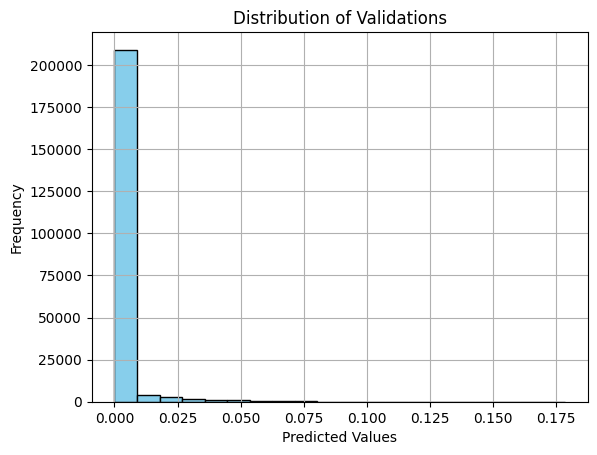

In [ ]:
import matplotlib.pyplot as plt

# Assuming predictions_np is your NumPy array
plt.hist(predictions_np, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Validations')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
val = pd.DataFrame(unino)
val = pd.concat([val, test[['換匯發送名單', '換匯基因標籤', '跨售行為', 'TOTALNTAMOUNT']]], axis = 1)
val.reset_index(drop=True, inplace=True)
val

,UNINO,換匯發送名單,換匯基因標籤,跨售行為,TOTALNTAMOUNT
0,A1718392970,0,0.198148,0,0.0
1,N2737156560,0,0.987469,0,0.0
2,E1709258280,0,0.541512,0,0.0
3,E1710741550,0,0.968977,0,0.0
4,B2757469030,0,0.177445,0,0.0
...,...,...,...,...,...
220743,N2719756810,0,0.585746,0,0.0
220744,O2225506120,0,0.346764,0,0.0
220745,Q2779183550,0,0.978013,0,0.0
220746,D1776320940,0,0.553099,0,0.0


In [ ]:
val.describe()

,換匯發送名單,換匯基因標籤,跨售行為,TOTALNTAMOUNT,Lift_NN|T = 0,Lift_NN|T = 1,Lift_NN
count,220748.000000,220748.000000,220748.000000,220748.0,220748.000000,220748.000000,220748.000000
mean,0.036046,0.534104,0.001803,0.0,0.002930,0.002588,-0.000342
std,0.186404,0.308709,0.042423,0.0,0.002584,0.002283,0.000310
min,0.000000,0.000000,0.000000,0.0,0.000005,0.000004,-0.005844
25%,0.000000,0.262769,0.000000,0.0,0.001305,0.001146,-0.000464
50%,0.000000,0.578979,0.000000,0.0,0.002394,0.002120,-0.000280
75%,0.000000,0.794317,0.000000,0.0,0.003887,0.003440,-0.000142
max,1.000000,1.000000,1.000000,0.0,0.048777,0.043659,0.000000


In [ ]:
#val['Lift_NN|T = 0'] = predictions_np
val['Lift_NN|T = 1'] = predictions_np
val['Lift_NN'] = val['Lift_NN|T = 1'] - val['Lift_NN|T = 0']
val

,UNINO,換匯發送名單,換匯基因標籤,跨售行為,TOTALNTAMOUNT,Lift_NN|T = 0,Lift_NN|T = 1,Lift_NN
0,A1718392970,0,0.198148,0,0.0,0.000679,0.000858,1.797403e-04
1,N2737156560,0,0.987469,0,0.0,0.001702,0.002152,4.495864e-04
2,E1709258280,0,0.541512,0,0.0,0.000414,0.000524,1.104216e-04
3,E1710741550,0,0.968977,0,0.0,0.000930,0.001181,2.508046e-04
4,B2757469030,0,0.177445,0,0.0,0.000177,0.000225,4.728498e-05
...,...,...,...,...,...,...,...,...
220743,N2719756810,0,0.585746,0,0.0,0.000100,0.000127,2.697588e-05
220744,O2225506120,0,0.346764,0,0.0,0.000002,0.000003,6.277019e-07
220745,Q2779183550,0,0.978013,0,0.0,0.023879,0.029723,5.844433e-03
220746,D1776320940,0,0.553099,0,0.0,0.001431,0.001816,3.849181e-04


In [ ]:
val.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202405_results.csv')

In [ ]:
!pip install scikit-uplift

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import pandas as pd
#import causalml
import random

%matplotlib inline
from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score, weighted_average_uplift

In [ ]:
from sklift.metrics import uplift_by_percentile
val['跨售行為'] = [0 if x == -1 else x for x in val['跨售行為']]
uplift_by_perc_df =  uplift_by_percentile(
    val["跨售行為"],
    val["Lift_NN"],
    val["換匯發送名單"],
    strategy="overall",
    total=False,
    std=True,
    bins=10
)

uplift_by_perc_df

,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,2907,19168,0.025112,0.015390,0.009722,0.002902,0.000889,0.003035
10-20,1457,20618,0.000686,0.000582,0.000104,0.000686,0.000168,0.000706
20-30,1078,20997,0.000928,0.000381,0.000547,0.000927,0.000135,0.000937
30-40,817,21258,0.000000,0.000282,-0.000282,0.000000,0.000115,0.000115
40-50,577,21498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50-60,405,21670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60-70,300,21775,0.000000,0.000046,-0.000046,0.000000,0.000046,0.000046
70-80,236,21839,0.000000,0.000046,-0.000046,0.000000,0.000046,0.000046
80-90,134,21940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


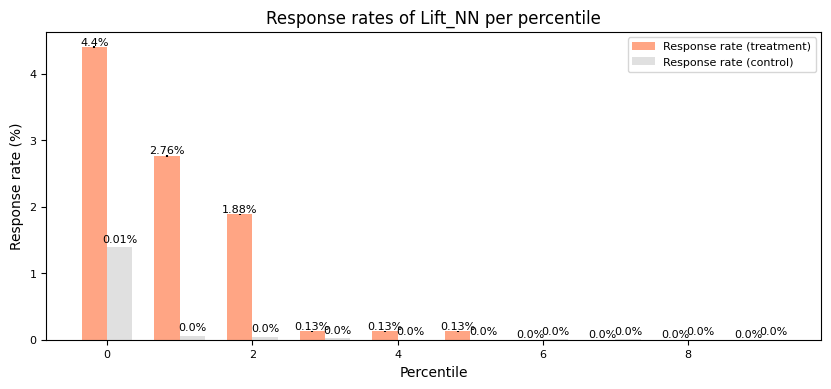

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklift.metrics import uplift_by_percentile

def plot_uplift_by_percentile(df, metric_column, bins=10):
    df['跨售行為'] = [0 if x == -1 else x for x in df['跨售行為']]

    # Fill NaN values in the metric_column with a specific value (e.g., 0)
    df[metric_column].fillna(0, inplace=True)

    uplift_by_perc_df = uplift_by_percentile(
        df["跨售行為"],
        df[metric_column],
        df["換匯發送名單"],
        strategy="by_group",
        total=False,
        std=True,
        bins=bins
    )

    fig, ax2 = plt.subplots(1, 1, figsize=(10, 4))
    #fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    '''
    # Plot the first graph (Uplift)
    bars1 = ax1.bar(
        uplift_by_perc_df.index,
        uplift_by_perc_df.uplift,
        yerr=uplift_by_perc_df.std_uplift * 2,
        color='coral',
        alpha=0.7
    )

    ax1.set_title(f'Uplift of {metric_column} per percentile', fontsize=12)
    ax1.set_ylabel('Uplift (%)', fontsize=10)

    # Adding smaller text labels on each bar for Uplift
    for bar, label in zip(bars1, uplift_by_perc_df.uplift):
        yval = bar.get_height()

        # Check for NaN values before rounding
        if not math.isnan(label):
            ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.006, f'{round(label * 100)}%', ha='center', va='bottom', fontsize=8)
        else:
            ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.006, 'NaN', ha='center', va='bottom', fontsize=8)'''

    # Plot the second graph (Response Rates for Treatment and Control)
    bar_width = 0.35
    index = np.arange(len(uplift_by_perc_df.index))

    bars2_treatment = ax2.bar(
        index - bar_width/2,
        uplift_by_perc_df.response_rate_treatment * 100,
        bar_width,
        label="Response rate (treatment)",
        color='coral',
        yerr=uplift_by_perc_df.std_treatment * 2,
        alpha=0.7
    )

    bars2_control = ax2.bar(
        index + bar_width/2,
        uplift_by_perc_df.response_rate_control * 100,
        bar_width,
        label="Response rate (control)",
        color='lightgrey',
        yerr=uplift_by_perc_df.std_control * 2,
        alpha=0.7
    )

    ax2.set_title(f'Response rates of {metric_column} per percentile', fontsize=12)
    ax2.set_xlabel('Percentile', fontsize=10)
    ax2.set_ylabel('Response rate (%)', fontsize=10)
    ax2.legend(fontsize=8)

    # Adding smaller text labels on each bar for Response Rates (Treatment)
    for bar, label in zip(bars2_treatment, uplift_by_perc_df.response_rate_treatment * 100):
        yval = bar.get_height()

        # Check for NaN values before rounding
        if not math.isnan(label):
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.006, f'{round(label,2)}%', ha='center', va='bottom', fontsize=8)
        else:
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.006, 'NaN', ha='center', va='bottom', fontsize=8)
    # Adding smaller text labels on each bar for Response Rates (Control)
    for bar, label in zip(bars2_control, uplift_by_perc_df.response_rate_control ):
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{round(label,2)}%', ha='center', va='bottom', fontsize=8)

    # Set smaller font size for tick labels
    ax2.tick_params(axis='both', which='major', labelsize=8)

    # Ensure that the y-axis starts from 0
    ax2.set_ylim(bottom=0)

    plt.show()

# Usage example for 'Uplift_mean' column
plot_uplift_by_percentile(val, 'Lift_NN')

In [ ]:
!pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.2/745.2 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)


In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = val
T =T[['換匯發送名單', '跨售行為',	'Lift_NN']]
cumgain = get_cumgain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=True, random_seed=42)
cumgain

,Lift_NN,Random
0,0.000000,0.000000
1,-0.000095,0.000000
2,-0.000382,0.000000
3,-0.000859,0.000000
4,-0.001146,0.000000
...,...,...
220744,0.999978,0.999993
220745,0.999984,0.999999
220746,0.999989,1.000004
220747,0.999995,0.999995


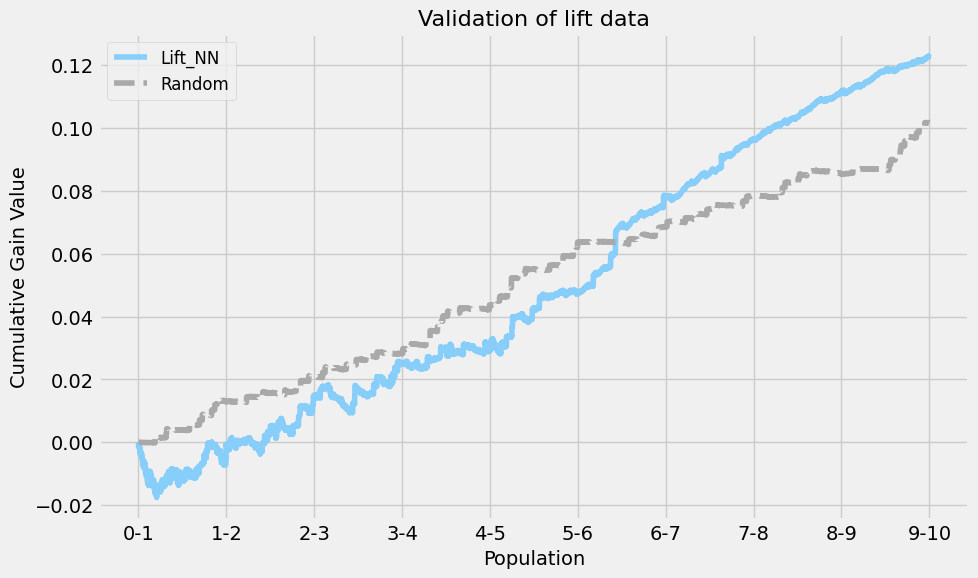

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already imported pandas as pd and have the necessary dataframes

#df = pd.concat([cumgain, cumgain_1['Gi']], axis=1)
#df = cumgain
df = cumgain[:len(cumgain)//10]
x = df.index

# Define the ranges for the x-axis labels
ranges = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
#ranges = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Resample x to have 11 evenly spaced points
x_resampled = np.linspace(0, len(x) - 1, 10, dtype=int)

# Plotting the lines with customizations
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.plot(x, df['Lift_NN'], label='Lift_NN', color='lightskyblue')  # Set color and line width
plt.plot(x, df['Random'], label='Random', color='darkgray', linestyle='--')  # Set color and marker

# Adding labels, title, and legend with custom text size
plt.xlabel('Population', fontsize=14)  # Set x-axis label with custom text size
plt.ylabel('Cumulative Gain Value', fontsize=14)  # Set y-axis label with custom text size
plt.title('Validation of lift data', fontsize=16)  # Set title with custom text size
plt.legend(fontsize=12)  # Set legend with custom text size

# Setting x-axis ticks and labels
plt.xticks(x_resampled, ranges)

# Displaying the plot
plt.show()

### Predictions

In [48]:
import zipfile

# Specify the path to the zip file
#zip_file_path = 'data202305.csv.zip'
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202401.csv.zip'


# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#df = pd.read_csv('/content/drive/MyDrive/Sinopac/train_202402.csv')
df = pd.read_csv('/content/data202401.csv', index_col = 0)
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,F2593340910,18,0,2.0,0,120.0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,F2593358270,19,0,2.0,0,0.0,1,2,0,3,...,0,0,0,0,0,1,0,0,0,0
2,F2593378680,19,0,2.0,0,50.0,1,0,0,6,...,0,0,0,0,0,1,0,0,0,0
3,F2593397620,19,0,2.0,0,0.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
4,F2598703540,17,0,2.0,0,0.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092946,Z1222305990,50,0,1.0,0,600.0,1,3,0,1,...,0,0,0,1,0,0,0,1,0,1
1092947,Y2729592620,60,0,2.0,0,0.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
1092948,Z1222367980,47,0,1.0,0,420.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1092949,Z1222472300,30,0,1.0,0,550.0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [50]:
num_cols = ['年齡', '薪轉員工平均薪資', '全行往來產品數_持有', '全行往來產品數_使用', '基金近1個月申購次數', '基金近3個月申購次數',
       '基金近6個月申購次數', '基金近12個月申購次數', '最近一個月刷卡筆數', '最近三個月刷卡筆數', '最近六個月刷卡筆數',
       '共同行銷合作推廣_證券', '證券月交易筆數', '證券近一年交易筆數', '證券庫存股檔數', 'TOTALNTAMOUNT',
       '外匯交易金額_近三個月']
#df.select_dtypes(include=['int64']).columns[~df.select_dtypes(include=['int64']).columns.isin(binary_columns)] #111

In [ ]:
#1. Minmax
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exclude non-numeric columns if any
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_cols = list(numeric_cols)+(num_cols) #128
#numeric_cols.append(num_cols)
# Initializing MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.drop(['UNINO'], axis = 1, inplace = True)
print(df.shape)

(1106679, 204)


In [51]:
#1. Minmax
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exclude non-numeric columns if any
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_cols = numeric_cols.tolist()  # Convert Index to list

# Concatenate the lists of column names
numeric_cols += num_cols

# Assuming df is your DataFrame and columns_to_winsorize contains the column names you want to winsorize
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=(0.05, 0.05))

# Initializing MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.drop(['UNINO'], axis = 1, inplace = True)
print(df.shape)

(1092951, 204)


In [52]:
# Load the model
model = CustomNet(input_size)
model.load_state_dict(torch.load('/content/drive/MyDrive/Model/NN_202312.pth'))
model.eval()  # Set the model to evaluation mode

CustomNet(
  (feature_extractor): Sequential(
    (0): Linear(in_features=202, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
  (branch2): Sequential(
    (0): Linear(in_features=202, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

In [59]:
#T1 = pi01
#Treatment = 1
df.iloc[:, 149] = 1
#print(df.iloc[:, 149])
df.iloc[:, 149]

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1092946    1.0
1092947    1.0
1092948    1.0
1092949    1.0
1092950    1.0
Name: 換匯發送名單, Length: 1092951, dtype: float64

In [60]:
#202402
df = df.astype(float)
X_pred = torch.tensor(df.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values)  # Exclude the last column
y_pred = torch.tensor(df['跨售行為'].values)  # Last column as the target variable

criterion = nn.BCELoss()

# Set model to evaluation mode
model.eval()

# Pass test data through the model
with torch.no_grad():
    predictions = model(X_pred.float())

# Convert predictions to numpy array for further processing if needed
predictions_np = predictions.cpu().numpy()

# Print predictions
print("Predictions:", predictions_np)

# Compute the loss if needed
loss_test = criterion(predictions.squeeze(), y_pred.float())
print("Test Loss:", loss_test.item())

# Compute accuracy or other metrics if needed
# For example, for binary classification, you can calculate accuracy
#predicted_labels = (predictions > 0.5).float()  # Convert probabilities to binary predictions
#accuracy = (predicted_labels == y_test).float().mean().item()
#print("Accuracy:", accuracy)

Predictions: [[0.02070252]
 [0.00135733]
 [0.00070339]
 ...
 [0.00563174]
 [0.00728869]
 [0.00698284]]
Test Loss: 0.018000682815909386


In [ ]:
import numpy as np

# Assuming predictions_np is your NumPy array
mean = np.mean(predictions_np)
median = np.median(predictions_np)
std_dev = np.std(predictions_np)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

Mean: 0.0021021934
Median: 0.001752294
Standard Deviation: 0.0018196108


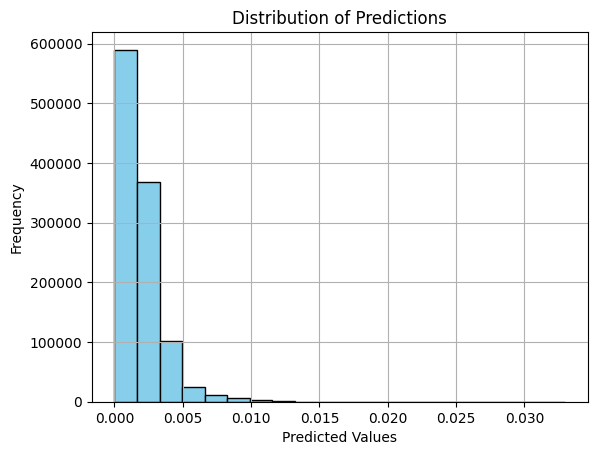

In [ ]:
import matplotlib.pyplot as plt

# Assuming predictions_np is your NumPy array
plt.hist(predictions_np, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [61]:
import pandas as pd
#res = pd.read_csv('/content/data202401.csv', usecols=['UNINO', '換匯基因標籤', '換匯發送名單','TOTALNTAMOUNT', '跨售行為'])
#res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202403.csv', index_col = 0)
#res['NN_lift_T=0'] = predictions_np
res['NN_lift_T=1'] = predictions_np
res['NN_lift'] = res['NN_lift_T=1']-res['NN_lift_T=0']
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift
0,F2593340910,75.7095,0,0,0,0.018584,0.020703,0.002118
1,F2593358270,84.0338,0,0,0,0.001216,0.001357,0.000141
2,F2593378680,73.1411,0,0,0,0.000630,0.000703,0.000073
3,F2593397620,72.0423,0,0,0,0.002633,0.002938,0.000305
4,F2598703540,75.5019,0,0,0,0.010811,0.012054,0.001243
...,...,...,...,...,...,...,...,...
1092946,Z1222305990,98.1841,0,0,0,0.006436,0.007180,0.000744
1092947,Y2729592620,96.3283,0,0,0,0.006245,0.006966,0.000722
1092948,Z1222367980,82.3242,0,0,0,0.005048,0.005632,0.000584
1092949,Z1222472300,89.6383,0,0,0,0.006534,0.007289,0.000755


In [62]:
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202401_回測.csv')
#1103740 rows × 6 columns

## Value


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/data202312_1.csv', index_col = 0)
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,19012621YA8,58,0,1.00000,0,0.00000,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
1,19039293TA8,59,0,1.00000,0,0.00000,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
2,19042120PA8,54,0,1.00000,0,0.00000,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0
3,19052324OK8,60,0,1.00000,0,0.00000,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
4,19052578MU0,60,0,1.00000,0,1000.00000,1,0,0,3,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076646,Z2229999030,80,0,2.00000,0,0.00000,1,2,0,3,...,0,0,0,1,0,0,0,0,0,0
1076647,Z2422221010,47,0,2.00000,0,1440.00000,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
1076648,Z2422273090,57,0,2.00000,0,0.00000,1,2,0,1,...,0,0,0,1,0,0,0,0,0,1
1076649,Z2794749990,56,0,2.00000,0,0.00000,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0


In [75]:
df['TOTALNTAMOUNT'].describe()

count   1076651.00000
mean        197.95066
std       11086.72619
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max     3259969.00000
Name: TOTALNTAMOUNT, dtype: float64

In [10]:
df.select_dtypes(include=['object']).columns

Index(['UNINO'], dtype='object')

In [76]:
num_cols = ['年齡', '薪轉員工平均薪資', '全行往來產品數_持有', '全行往來產品數_使用', '基金近1個月申購次數', '基金近3個月申購次數',
       '基金近6個月申購次數', '基金近12個月申購次數', '最近一個月刷卡筆數', '最近三個月刷卡筆數', '最近六個月刷卡筆數',
       '共同行銷合作推廣_證券', '證券月交易筆數', '證券近一年交易筆數', '證券庫存股檔數', 'TOTALNTAMOUNT',
       '外匯交易金額_近三個月']
#df.select_dtypes(include=['int64']).columns[~df.select_dtypes(include=['int64']).columns.isin(binary_columns)] #111

In [77]:
#1. Minmax
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exclude non-numeric columns if any
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_cols = numeric_cols.tolist()  # Convert Index to list

# Concatenate the lists of column names
numeric_cols += num_cols

# Assuming df is your DataFrame and columns_to_winsorize contains the column names you want to winsorize
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=(0.05, 0.05))

# Initializing MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

train, test = train_test_split(df, test_size=0.2, random_state=42)
train.drop(['UNINO'], axis = 1, inplace = True)
unino = test['UNINO']
test.drop(['UNINO'], axis = 1, inplace = True)
print(train.shape, test.shape)

(861320, 204) (215331, 204)


In [14]:
train.iloc[:,149].name

'換匯發送名單'

In [78]:
import torch
import torch.nn as nn

class MultiplyByTheta(nn.Module):
    def __init__(self, output_features):
        super(MultiplyByTheta, self).__init__()
        # Initialize theta as a parameter with 1.0 as its initial value
        # This assumes theta is a scalar. Adjust the size for vector outputs.
        self.theta = nn.Parameter(torch.ones(output_features))

    def forward(self, x):
        # Multiply input by theta
        return x * self.theta

class CustomNet(nn.Module):
    def __init__(self, input_size):
        super(CustomNet, self).__init__()
        # Branch 1
        self.fc1_branch1 = nn.Linear(input_size, 128)
        self.bn1_branch1 = nn.BatchNorm1d(128)  # Add batch normalization
        self.relu1_branch1 = nn.ReLU()
        self.fc2_branch1 = nn.Linear(128, 1)

        # Branch 2
        self.fc1_branch2 = nn.Linear(input_size, 128)
        self.bn1_branch2 = nn.BatchNorm1d(128)  # Add batch normalization
        self.relu1_branch2 = nn.ReLU()
        self.fc2_branch2 = nn.Linear(128, 2)

        # Hidden layer
        #self.fc_hidden = nn.Linear(3, 64)

        # Output layer
        self.fc_output = nn.Linear(3, 1)

        # MultiplyByTheta module
        self.multiply_theta = MultiplyByTheta(output_features=1)

    def forward(self, x):
        # Branch 1
        x_branch1 = self.relu1_branch1(self.bn1_branch1(self.fc1_branch1(x)))
        x_branch1 = self.fc2_branch1(x_branch1)

        # Branch 2
        x_branch2 = self.relu1_branch2(self.bn1_branch2(self.fc1_branch2(x)))
        T1 = x[:, 149].unsqueeze(1)
        T2 = 1 - T1
        x_branch2 = torch.sigmoid(x_branch2)  # Apply sigmoid activation before element-wise multiplication
        T1_multiplied = x_branch2[:, 0].unsqueeze(1) * T1
        T2_multiplied = x_branch2[:, 1].unsqueeze(1) * T2

        # Concatenate both branches
        x_concat = torch.cat((x_branch1, T1_multiplied, T2_multiplied), dim=1)

        # Hidden layer
        #x_hidden = torch.sigmoid(self.fc_hidden(x_concat))

        # Output layer
        output = torch.sigmoid(self.fc_output(x_concat))

        # Multiply by theta
        output = self.multiply_theta(output)

        return output

# Example usage
input_size = 202  # Number of input features
model = CustomNet(input_size)

# Print model architecture
print(model)

CustomNet(
  (fc1_branch1): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch1): ReLU()
  (fc2_branch1): Linear(in_features=128, out_features=1, bias=True)
  (fc1_branch2): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch2): ReLU()
  (fc2_branch2): Linear(in_features=128, out_features=2, bias=True)
  (fc_output): Linear(in_features=3, out_features=1, bias=True)
  (multiply_theta): MultiplyByTheta()
)


In [79]:
# Check if GPU is available and move model to GPU
if torch.cuda.is_available():
    model = model.cuda()

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
train = train.astype(float)
test = test.astype(float)
X_tensor = torch.tensor(train.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values, dtype=torch.float32)
y_tensor = torch.tensor(train['TOTALNTAMOUNT'].values, dtype=torch.float32)
X_val = torch.tensor(test.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values, dtype=torch.float32)
y_val = torch.tensor(test['TOTALNTAMOUNT'].values, dtype=torch.float32)
# Define the hyperparameter search space
learning_rates = [0.001, 0.01, 0.1]
weight_decays = [0.001, 0.01, 0.1]
epochs = [10, 20, 30]

best_loss = float('inf')
best_hyperparameters = {}

# Iterate over all hyperparameter combinations
for lr in learning_rates:
    for weight_decay in weight_decays:
        for num_epochs in epochs:
            # Define the model
            input_size = 202  # Number of input features
            model = CustomNet(input_size)

            if torch.cuda.is_available():
                device = torch.device("cuda")
                model = model.to(device)
                X_tensor = X_tensor.to(device)
                y_tensor = y_tensor.to(device)
                X_val = X_val.to(device)
                y_val = y_val.to(device)
            else:
                device = torch.device("cpu")

            # Define the loss function: Mean Squared Error (MSE)
            criterion = nn.MSELoss()

            # Define the optimizer
            optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

            # Training loop
            for epoch in range(num_epochs):
                # Forward pass
                outputs = model(X_tensor)
                loss = criterion(outputs.squeeze(), y_tensor)

                # Backward pass and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Evaluate the model on validation data
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs.squeeze(), y_val)

            # Update best hyperparameters if the current combination is better
            if val_loss < best_loss:
                best_loss = val_loss
                best_hyperparameters = {"lr": lr, "weight_decay": weight_decay, "epochs": num_epochs}

# Train the final model using the best hyperparameters
input_size = 202  # Number of input features
model = CustomNet(input_size)
if torch.cuda.is_available():
  device = torch.device("cuda")
  model = model.to(device)
optimizer = optim.SGD(model.parameters(), lr=best_hyperparameters["lr"], weight_decay=best_hyperparameters["weight_decay"])
criterion = nn.MSELoss()

for epoch in range(best_hyperparameters["epochs"]):
    # Forward pass
    outputs = model(X_tensor)

    loss = criterion(outputs.squeeze(), y_tensor)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'lr': 0.1, 'weight_decay': 0.1, 'epochs': 30}


In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Assuming you have your input data X, target variable y, and theta values in tensors
train = train.astype(float)
X_tensor = torch.tensor(train.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values, dtype=torch.float32)
y_tensor = torch.tensor(train['TOTALNTAMOUNT'].values, dtype=torch.float32)

# Define the model
input_size = 202  # Number of input features
model = CustomNet(input_size)

# Define the loss function: Mean Squared Error (MSE)
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(),  lr=0.1, weight_decay=0.1)
# Define the learning rate scheduler
scheduler = StepLR(optimizer, step_size=1000, gamma=0.1)  # Reduce LR by a factor of 0.1 every 1000 epochs

# Training loop
num_epochs = 50000
desired_loss = 0.005

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs.squeeze(), y_tensor)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Update the learning rate
    scheduler.step()

    # Print loss every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Check if the loss is below the desired threshold
    if loss.item() < desired_loss:
        print(f'Loss reached the desired threshold of {desired_loss}. Stopping training...')
        break

Epoch [1/50000], Loss: 0.2973
Epoch [2/50000], Loss: 0.2207
Epoch [3/50000], Loss: 0.1716
Epoch [4/50000], Loss: 0.1379
Epoch [5/50000], Loss: 0.1138
Epoch [6/50000], Loss: 0.0958
Epoch [7/50000], Loss: 0.0820
Epoch [8/50000], Loss: 0.0712
Epoch [9/50000], Loss: 0.0625
Epoch [10/50000], Loss: 0.0555
Epoch [11/50000], Loss: 0.0497
Epoch [12/50000], Loss: 0.0448
Epoch [13/50000], Loss: 0.0406
Epoch [14/50000], Loss: 0.0371
Epoch [15/50000], Loss: 0.0340
Epoch [16/50000], Loss: 0.0313
Epoch [17/50000], Loss: 0.0289
Epoch [18/50000], Loss: 0.0268
Epoch [19/50000], Loss: 0.0249
Epoch [20/50000], Loss: 0.0232
Epoch [21/50000], Loss: 0.0216
Epoch [22/50000], Loss: 0.0202
Epoch [23/50000], Loss: 0.0189
Epoch [24/50000], Loss: 0.0178
Epoch [25/50000], Loss: 0.0167
Epoch [26/50000], Loss: 0.0156
Epoch [27/50000], Loss: 0.0147
Epoch [28/50000], Loss: 0.0138
Epoch [29/50000], Loss: 0.0130
Epoch [30/50000], Loss: 0.0122
Epoch [31/50000], Loss: 0.0115
Epoch [32/50000], Loss: 0.0108
Epoch [33/50000],

In [82]:
# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/Model/NN_value_202312.pth')

In [17]:
# Load the model
model = CustomNet(input_size)
model.load_state_dict(torch.load('/content/drive/MyDrive/Model/NN_value_202312.pth'))
model.eval()  # Set the model to evaluation mode

CustomNet(
  (fc1_branch1): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch1): ReLU()
  (fc2_branch1): Linear(in_features=128, out_features=1, bias=True)
  (fc1_branch2): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch2): ReLU()
  (fc2_branch2): Linear(in_features=128, out_features=2, bias=True)
  (fc_output): Linear(in_features=3, out_features=1, bias=True)
  (multiply_theta): MultiplyByTheta()
)

In [86]:
test.iloc[:,149] = 1

In [87]:
# Prediction
# Assuming you have your test input data X_test in a tensor
#test_data = torch.tensor(test.values, dtype=torch.float32)
test = test.astype(float)
X_test = torch.tensor(test.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values)  # Exclude the last column
y_test = torch.tensor(test['TOTALNTAMOUNT'].values)  # Last column as the target variable

# Define the loss function: Mean Squared Error (MSE)
criterion = nn.MSELoss()

# Set model to evaluation mode
model.eval()

# Pass test data through the model
with torch.no_grad():
    predictions = model(X_test.float())

# Convert predictions to numpy array for further processing if needed
predictions_np = predictions.cpu().numpy()

# Print predictions
print("Predictions:", predictions_np)

# Compute the loss if needed
loss_test = criterion(predictions.squeeze(), y_test.float())
print("Test Loss:", loss_test.item())

Predictions: [[0.0752225 ]
 [0.0713754 ]
 [0.07550961]
 ...
 [0.07799723]
 [0.07136908]
 [0.0750244 ]]
Test Loss: 0.005701866932213306


In [85]:
# Define the min and max values for each feature
min_val = df['TOTALNTAMOUNT'].min()
max_val = df['TOTALNTAMOUNT'].max()

# Apply the inverse transform manually
predictions_np = (predictions_np * (max_val - min_val)) + min_val
predictions_np

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

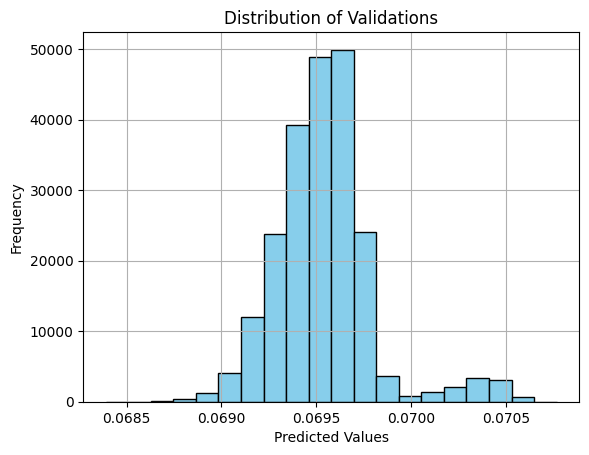

In [ ]:
import matplotlib.pyplot as plt

# Assuming predictions_np is your NumPy array
plt.hist(predictions_np, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Validations')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
val = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202405_results.csv', index_col = 0)
val

,UNINO,換匯發送名單,換匯基因標籤,跨售行為,TOTALNTAMOUNT,Lift_NN|T = 0,Lift_NN|T = 1,Lift_NN,Value_NN|T = 0,Value_NN|T = 1,Value_NN
0,A1718392970,0,0.198148,0,0.0,0.005170,0.004610,-0.000560,202628.270182,222224.010319,19595.740137
1,N2737156560,0,0.987469,0,0.0,0.002209,0.001936,-0.000273,194725.371144,207755.278786,13029.907642
2,E1709258280,0,0.541512,0,0.0,0.000868,0.000751,-0.000116,254596.861705,274967.980937,20371.119231
3,E1710741550,0,0.968977,0,0.0,0.003354,0.002922,-0.000432,219946.073885,240168.303620,20222.229734
4,B2757469030,0,0.177445,0,0.0,0.001510,0.001329,-0.000181,236698.473975,259944.884988,23246.411012
...,...,...,...,...,...,...,...,...,...,...,...
220743,N2719756810,0,0.585746,0,0.0,0.000482,0.000422,-0.000060,257778.263491,279092.122840,21313.859349
220744,O2225506120,0,0.346764,0,0.0,0.000007,0.000006,-0.000001,224622.491381,253705.079200,29082.587819
220745,Q2779183550,0,0.978013,0,0.0,0.002708,0.002348,-0.000360,225664.839301,232580.695701,6915.856400
220746,D1776320940,0,0.553099,0,0.0,0.003336,0.002938,-0.000398,233203.724164,253532.969742,20329.245578


In [ ]:
#val['Value_NN|T = 0'] = predictions_np
val['Value_NN|T = 1'] = predictions_np
val['Value_NN'] = val['Value_NN|T = 1'] - val['Value_NN|T = 0']
val

,UNINO,換匯發送名單,換匯基因標籤,跨售行為,TOTALNTAMOUNT,Lift_NN|T = 0,Lift_NN|T = 1,Lift_NN,Value_NN|T = 0,Value_NN|T = 1,Value_NN
0,A1718392970,0,0.198148,0,0.0,0.000679,0.000858,1.797403e-04,202628.270182,222224.010319,19595.740137
1,N2737156560,0,0.987469,0,0.0,0.001702,0.002152,4.495864e-04,194725.371144,207755.278786,13029.907642
2,E1709258280,0,0.541512,0,0.0,0.000414,0.000524,1.104216e-04,254596.861705,274967.980937,20371.119231
3,E1710741550,0,0.968977,0,0.0,0.000930,0.001181,2.508046e-04,219946.073885,240168.303620,20222.229734
4,B2757469030,0,0.177445,0,0.0,0.000177,0.000225,4.728498e-05,236698.473975,259944.884988,23246.411012
...,...,...,...,...,...,...,...,...,...,...,...
220743,N2719756810,0,0.585746,0,0.0,0.000100,0.000127,2.697588e-05,257778.263491,279092.122840,21313.859349
220744,O2225506120,0,0.346764,0,0.0,0.000002,0.000003,6.277019e-07,224622.491381,253705.079200,29082.587819
220745,Q2779183550,0,0.978013,0,0.0,0.023879,0.029723,5.844433e-03,225664.839301,232580.695701,6915.856400
220746,D1776320940,0,0.553099,0,0.0,0.001431,0.001816,3.849181e-04,233203.724164,253532.969742,20329.245578


In [ ]:
val.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202405_results.csv')

In [ ]:
import pandas as pd
import numpy as np
def response_value_by_percentile(true_value, lift_value, treatment, group, bins=10):

    true_value, lift_value, treatment = np.array(true_value), np.array(lift_value), np.array(treatment)
    order = np.argsort(lift_value, kind='mergesort')[::-1]

    trmnt_flag = 1 if group == 'treatment' else 0


    y_true_bin = np.array_split(true_value[order], bins)
    trmnt_bin = np.array_split(treatment[order], bins)
    group_size = np.array([len(y[trmnt == trmnt_flag]) for y, trmnt in zip(y_true_bin, trmnt_bin)])
    response_value = np.array([np.mean(y[trmnt == trmnt_flag]) for y, trmnt in zip(y_true_bin, trmnt_bin)])
    variance = np.array([np.var(y[trmnt == trmnt_flag]) for y, trmnt in zip(y_true_bin, trmnt_bin)])
    #variance = np.multiply(response_value, np.divide((1 - response_value), group_size))

    return response_value, variance, group_size


def uplift_value_by_percentile(true_value, lift_value, treatment, bins=10, string_percentiles=True):
    true_value, lift_value, treatment = np.array(true_value), np.array(lift_value), np.array(treatment)

    response_value_trmnt, variance_trmnt, n_trmnt = response_value_by_percentile(
        true_value, lift_value, treatment, group='treatment', bins=bins)

    response_value_ctrl, variance_ctrl, n_ctrl = response_value_by_percentile(
        true_value, lift_value, treatment, group='control', bins=bins)

    uplift_scores = response_value_trmnt - response_value_ctrl
    uplift_variance = variance_trmnt + variance_ctrl

    percentiles = [round(p * 100 / bins) for p in range(1, bins + 1)]

    if string_percentiles:
        percentiles = [f"0-{percentiles[0]}"] + \
            [f"{percentiles[i]}-{percentiles[i + 1]}" for i in range(len(percentiles) - 1)]


    df = pd.DataFrame({
        'percentile': percentiles,
        'n_treatment': n_trmnt,
        'n_control': n_ctrl,
        'response_value_treatment': response_value_trmnt,
        'response_value_control': response_value_ctrl,
        'uplift': uplift_scores
    })

    std_treatment = np.sqrt(variance_trmnt)
    std_control = np.sqrt(variance_ctrl)
    std_uplift = np.sqrt(uplift_variance)

    df.loc[:, 'std_treatment'] = std_treatment
    df.loc[:, 'std_control'] = std_control
    df.loc[:, 'std_uplift'] = std_uplift

    df = df \
        .set_index('percentile', drop=True, inplace=False) \
        .astype({'n_treatment': 'int32', 'n_control': 'int32'})

    return df

In [ ]:
val['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT']
val['TOTALNTAMOUNT'].describe()

count    2.207480e+05
mean     1.971747e+02
std      9.007271e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.410616e+06
Name: TOTALNTAMOUNT, dtype: float64

In [ ]:
uplift_value_by_percentile(
        val["TOTALNTAMOUNT"],
        val['Value_NN'],
        val["換匯發送名單"],
        bins=10
    )

,n_treatment,n_control,response_value_treatment,response_value_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,1224,20851,391.869281,183.982399,207.886882,9713.252138,7225.633020,12106.074493
10-20,626,21449,0.000000,238.600401,-238.600401,0.000000,9139.044696,9139.044696
20-30,660,21415,260.786364,123.063180,137.723184,4792.080568,4470.502911,6553.581650
30-40,667,21408,0.000000,262.945441,-262.945441,0.000000,12200.195299,12200.195299
40-50,653,21422,0.000000,70.462282,-70.462282,0.000000,3271.157935,3271.157935
50-60,747,21328,55.910308,214.007877,-158.097569,1527.078271,9687.371290,9806.993961
60-70,829,21246,132.455971,248.185494,-115.729523,3811.419128,12516.241267,13083.700211
70-80,843,21232,21.294187,223.468161,-202.173974,439.502778,10307.250759,10316.616737
80-90,890,21184,1162.701124,198.295553,964.405570,33510.549164,7653.449891,34373.422880


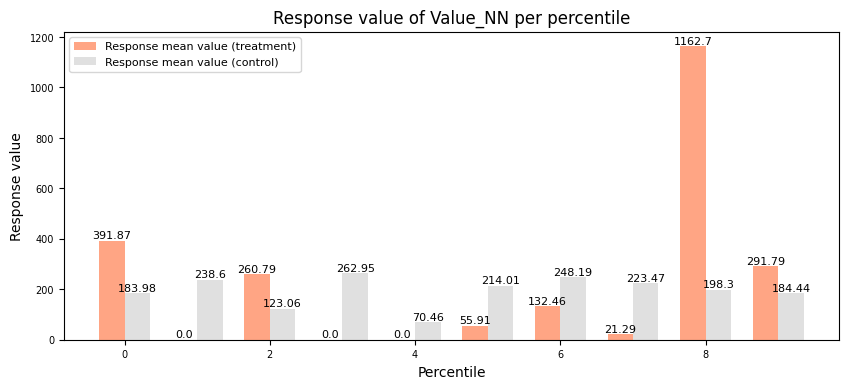

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklift.metrics import uplift_by_percentile

def plot_uplift_value_by_percentile(df, metric_column, bins=10):

    # Fill NaN values in the metric_column with a specific value (e.g., 0)
    df[metric_column].fillna(0, inplace=True)

    uplift_by_perc_df = uplift_value_by_percentile(
        df["TOTALNTAMOUNT"],
        df[metric_column],
        df["換匯發送名單"],
        bins=10
    )
    fig, ax2 = plt.subplots(1, 1, figsize=(10, 4))

    # Plot the second graph (Response Rates for Treatment and Control)
    bar_width = 0.35
    index = np.arange(len(uplift_by_perc_df.index))

    bars2_treatment = ax2.bar(
        index - bar_width/2,
        uplift_by_perc_df.response_value_treatment,
        bar_width,
        label="Response mean value (treatment)",
        color='coral',
        #yerr=uplift_by_perc_df.std_treatment * 2,
        alpha=0.7
    )

    bars2_control = ax2.bar(
        index + bar_width/2,
        uplift_by_perc_df.response_value_control,
        bar_width,
        label="Response mean value (control)",
        color='lightgrey',
        #yerr=uplift_by_perc_df.std_control * 2,
        alpha=0.7
    )

    ax2.set_title(f'Response value of {metric_column} per percentile', fontsize=12)
    ax2.set_xlabel('Percentile', fontsize=10)
    ax2.set_ylabel('Response value', fontsize=10)
    ax2.legend(fontsize=8)

    # Adding smaller text labels on each bar for Response Rates (Treatment)
    for bar, label in zip(bars2_treatment, uplift_by_perc_df.response_value_treatment):
        yval = bar.get_height()

        # Check for NaN values before rounding
        if not math.isnan(label):
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{round(label, 2)}', ha='center', va='bottom', fontsize=8)
        else:
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.00001, 'NaN', ha='center', va='bottom', fontsize=8)

    # Adding smaller text labels on each bar for Response Rates (Control)
    for bar, label in zip(bars2_control, uplift_by_perc_df.response_value_control):
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.0005, f'{round(label, 2)}', ha='center', va='bottom', fontsize=8)

    # Set smaller font size for tick labels
    ax2.tick_params(axis='both', which='major', labelsize=7)

    # Ensure that the y-axis starts from 0
    ax2.set_ylim(bottom=0)

    plt.show()

# Usage example for 'Uplift_mean' column
plot_uplift_value_by_percentile(val, 'Value_NN')

In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = val
T =T[['換匯發送名單', 'TOTALNTAMOUNT',	'Value_NN']]
#T['Value_NN'] = T['Value_NN']/(max_val - min_val)
cumgain = get_cumgain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=True, random_seed=42)
cumgain

,Value_NN,Random
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
220744,0.999928,0.999978
220745,0.999946,0.999996
220746,0.999964,1.000014
220747,0.999982,0.999982


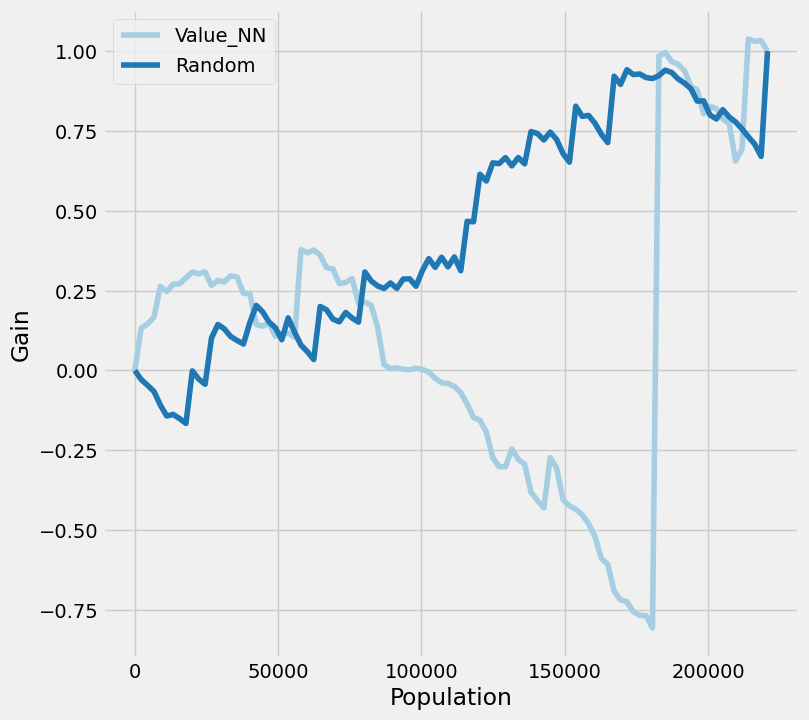

In [ ]:
plot_gain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=True, random_seed=42)

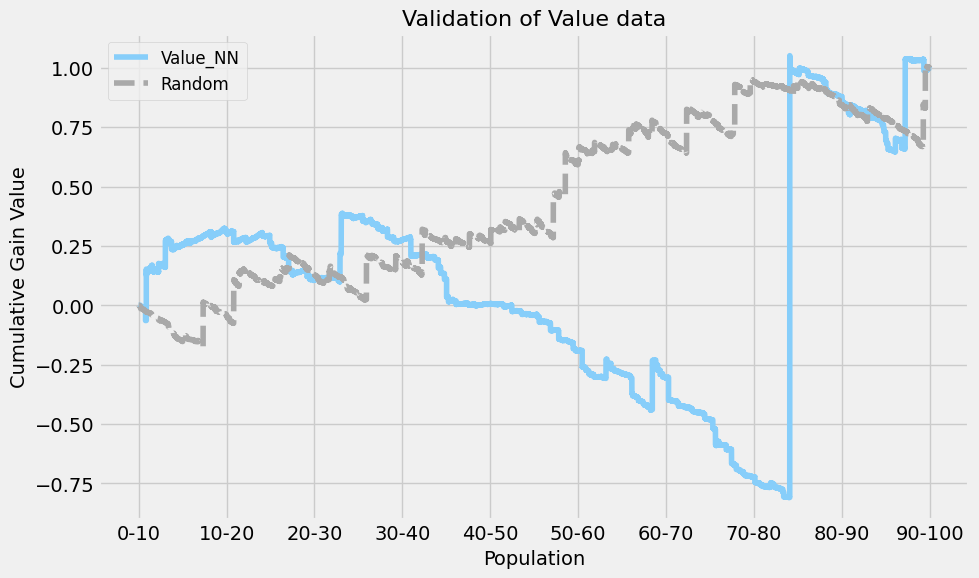

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already imported pandas as pd and have the necessary dataframes

#df = pd.concat([cumgain, cumgain_1['Gi']], axis=1)
df = cumgain
#df = cumgain[:len(cumgain)//10]
x = df.index

# Define the ranges for the x-axis labels
#ranges = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
ranges = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Resample x to have 11 evenly spaced points
x_resampled = np.linspace(0, len(x) - 1, 10, dtype=int)

# Plotting the lines with customizations
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.plot(x, df['Value_NN'], label='Value_NN', color='lightskyblue')  # Set color and line width
plt.plot(x, df['Random'], label='Random', color='darkgray', linestyle='--')  # Set color and marker

# Adding labels, title, and legend with custom text size
plt.xlabel('Population', fontsize=14)  # Set x-axis label with custom text size
plt.ylabel('Cumulative Gain Value', fontsize=14)  # Set y-axis label with custom text size
plt.title('Validation of Value data', fontsize=16)  # Set title with custom text size
plt.legend(fontsize=12)  # Set legend with custom text size

# Setting x-axis ticks and labels
plt.xticks(x_resampled, ranges)

# Displaying the plot
plt.show()

###Predictions

In [ ]:
import zipfile

# Specify the path to the zip file
#zip_file_path = 'data202305.csv.zip'
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202403.csv.zip'


# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#df = pd.read_csv('/content/drive/MyDrive/Sinopac/train_202402.csv')
df = pd.read_csv('/content/data202401.csv', index_col = 0)
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,F2593340910,18,0,2.00000,0,120.00000,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,F2593358270,19,0,2.00000,0,0.00000,1,2,0,3,...,0,0,0,0,0,1,0,0,0,0
2,F2593378680,19,0,2.00000,0,50.00000,1,0,0,6,...,0,0,0,0,0,1,0,0,0,0
3,F2593397620,19,0,2.00000,0,0.00000,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
4,F2598703540,17,0,2.00000,0,0.00000,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092946,Z1222305990,50,0,1.00000,0,600.00000,1,3,0,1,...,0,0,0,1,0,0,0,1,0,1
1092947,Y2729592620,60,0,2.00000,0,0.00000,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
1092948,Z1222367980,47,0,1.00000,0,420.00000,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1092949,Z1222472300,30,0,1.00000,0,550.00000,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [89]:
num_cols = ['年齡', '薪轉員工平均薪資', '全行往來產品數_持有', '全行往來產品數_使用', '基金近1個月申購次數', '基金近3個月申購次數',
       '基金近6個月申購次數', '基金近12個月申購次數', '最近一個月刷卡筆數', '最近三個月刷卡筆數', '最近六個月刷卡筆數',
       '共同行銷合作推廣_證券', '證券月交易筆數', '證券近一年交易筆數', '證券庫存股檔數', 'TOTALNTAMOUNT',
       '外匯交易金額_近三個月']
#df.select_dtypes(include=['int64']).columns[~df.select_dtypes(include=['int64']).columns.isin(binary_columns)] #111

In [90]:
df['TOTALNTAMOUNT'].mean()

250.63763151321513

In [103]:
#1. Minmax
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exclude non-numeric columns if any
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_cols = numeric_cols.tolist()  # Convert Index to list

# Concatenate the lists of column names
numeric_cols += num_cols

min_val = df['TOTALNTAMOUNT'].min()
max_val = df['TOTALNTAMOUNT'].max()


# Assuming df is your DataFrame and columns_to_winsorize contains the column names you want to winsorize
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=(0.05, 0.05))

# Initializing MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.drop(['UNINO'], axis = 1, inplace = True)
print(df.shape)

(1092951, 204)


In [92]:
# Load the model
model = CustomNet(input_size)
model.load_state_dict(torch.load('/content/drive/MyDrive/Model/NN_value_202312.pth'))
model.eval()  # Set the model to evaluation mode

CustomNet(
  (fc1_branch1): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch1): ReLU()
  (fc2_branch1): Linear(in_features=128, out_features=1, bias=True)
  (fc1_branch2): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch2): ReLU()
  (fc2_branch2): Linear(in_features=128, out_features=2, bias=True)
  (fc_output): Linear(in_features=3, out_features=1, bias=True)
  (multiply_theta): MultiplyByTheta()
)

In [108]:
#T1 = pi01
#Treatment = 1
df.iloc[:, 149] = 1
df.iloc[:, 149]

0         1.00000
1         1.00000
2         1.00000
3         1.00000
4         1.00000
            ...  
1092946   1.00000
1092947   1.00000
1092948   1.00000
1092949   1.00000
1092950   1.00000
Name: 換匯發送名單, Length: 1092951, dtype: float64

In [109]:
#202402
df = df.astype(float)
X_pred = torch.tensor(df.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values)  # Exclude the last column
y_pred = torch.tensor(df['TOTALNTAMOUNT'].values)  # Last column as the target variable

# Define the loss function: Mean Squared Error (MSE)
criterion = nn.MSELoss()

# Set model to evaluation mode
model.eval()

# Pass test data through the model
with torch.no_grad():
    predictions = model(X_pred.float())

# Convert predictions to numpy array for further processing if needed
predictions_np = predictions.cpu().numpy()

# Print predictions
print("Predictions:", predictions_np)

# Compute the loss if needed
loss_test = criterion(predictions.squeeze(), y_pred.float())
print("Test Loss:", loss_test.item())

Predictions: [[0.07464042]
 [0.07806832]
 [0.07820279]
 ...
 [0.07851699]
 [0.07725425]
 [0.07696116]]
Test Loss: 0.0057051656767725945


In [110]:
#predictions_np_0 = predictions_np
predictions_np_0.mean()
predictions_np_1 = predictions_np
predictions_np_1.mean()

0.07549517

In [111]:
# Define the min and max values for each feature
#min_val = df['TOTALNTAMOUNT'].min()
#max_val = df['TOTALNTAMOUNT'].max()

# Apply the inverse transform manually
predictions_np_0 = (predictions_np_0 * (max_val - min_val)) + min_val
predictions_np_1 = (predictions_np_1 * (max_val - min_val)) + min_val

In [56]:
import numpy as np

# Assuming predictions_np is your NumPy array
mean = np.mean(predictions_np)
median = np.median(predictions_np)
std_dev = np.std(predictions_np)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

Mean: 203659.57044824513
Median: 203028.7547633052
Standard Deviation: 1467.1826888799164


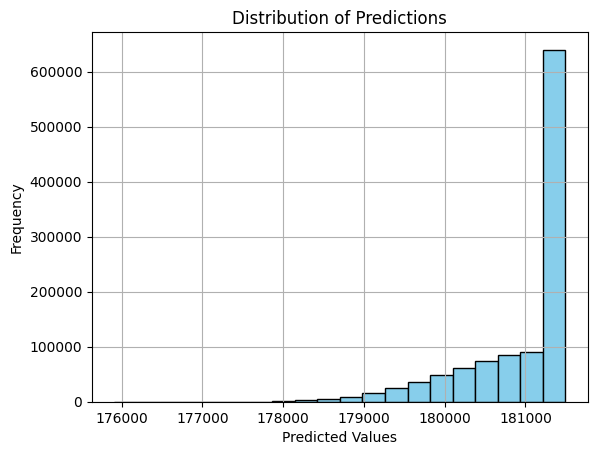

In [46]:
import matplotlib.pyplot as plt

# Assuming predictions_np is your NumPy array
plt.hist(predictions_np, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [26]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202401_回測.csv', index_col = 0)
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift
0,F2593340910,75.7095,0,0,0,0.018584,0.020703,0.002118
1,F2593358270,84.0338,0,0,0,0.001216,0.001357,0.000141
2,F2593378680,73.1411,0,0,0,0.000630,0.000703,0.000073
3,F2593397620,72.0423,0,0,0,0.002633,0.002938,0.000305
4,F2598703540,75.5019,0,0,0,0.010811,0.012054,0.001243
...,...,...,...,...,...,...,...,...
1092946,Z1222305990,98.1841,0,0,0,0.006436,0.007180,0.000744
1092947,Y2729592620,96.3283,0,0,0,0.006245,0.006966,0.000722
1092948,Z1222367980,82.3242,0,0,0,0.005048,0.005632,0.000584
1092949,Z1222472300,89.6383,0,0,0,0.006534,0.007289,0.000755


In [112]:
import pandas as pd
#res = pd.read_csv('/content/data202402.csv', usecols=['UNINO', '換匯基因標籤', '換匯發送名單','TOTALNTAMOUNT', '跨售行為'])
res['NN_value_T=0'] = predictions_np_0
res['NN_value_T=1'] = predictions_np_1
res['NN_value'] = res['NN_value_T=1'] - res['NN_value_T=0']
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift,NN_value_T=0,NN_value_T=1,NN_value
0,F2593340910,75.70950,0,0,0,0.01858,0.02070,0.00212,228024.59740,238058.14154,10033.54414
1,F2593358270,84.03380,0,0,0,0.00122,0.00136,0.00014,241949.12333,248991.08700,7041.96367
2,F2593378680,73.14110,0,0,0,0.00063,0.00070,0.00007,236948.15357,249419.98325,12471.82968
3,F2593397620,72.04230,0,0,0,0.00263,0.00294,0.00031,239601.94468,242579.45753,2977.51285
4,F2598703540,75.50190,0,0,0,0.01081,0.01205,0.00124,222207.37266,236651.75915,14444.38649
...,...,...,...,...,...,...,...,...,...,...,...
1092946,Z1222305990,98.18410,0,0,0,0.00644,0.00718,0.00074,223043.61223,230928.35026,7884.73803
1092947,Y2729592620,96.32830,0,0,0,0.00624,0.00697,0.00072,228280.38106,237120.43447,8840.05340
1092948,Z1222367980,82.32420,0,0,0,0.00505,0.00563,0.00058,237154.17776,250422.08773,13267.90998
1092949,Z1222472300,89.63830,0,0,0,0.00653,0.00729,0.00075,233014.75504,246394.70701,13379.95196


In [113]:
# Import pandas
import pandas as pd

# Set the display option to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
res.iloc[:,5:].describe()

,NN_lift_T=0,NN_lift_T=1,NN_lift,NN_value_T=0,NN_value_T=1,NN_value
count,1092951.00000,1092951.00000,1092951.00000,1092951.00000,1092951.00000,1092951.00000
mean,0.00462,0.00516,0.00053,232396.29415,240784.26911,8387.97496
std,0.00403,0.00449,0.00046,8096.85552,7578.22840,3075.06381
min,0.00002,0.00003,0.00000,182722.48119,196188.98946,-1108.53843
25%,0.00219,0.00244,0.00025,227971.79628,236512.96016,5907.42864
50%,0.00364,0.00407,0.00042,233796.91030,242069.14964,8373.77814
75%,0.00597,0.00666,0.00069,238157.51791,246139.35108,10810.17452
max,0.06528,0.07232,0.00705,255766.40737,264451.97828,21089.77142


In [114]:
#res.to_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202403.csv')
#1103740 rows × 6 columns
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202401_回測.csv')
#1092951 rows × 11 columns

In [ ]:
output = res.drop(['UNINO'], axis = 1)
output.to_csv('/content/output.csv')

In [135]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202401_回測.csv', index_col = 0)
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift,NN_value_T=0,NN_value_T=1,NN_value
0,F2593340910,75.70950,0,0,0,0.01858,0.02070,0.00212,228024.59740,238058.14154,10033.54414
1,F2593358270,84.03380,0,0,0,0.00122,0.00136,0.00014,241949.12333,248991.08700,7041.96367
2,F2593378680,73.14110,0,0,0,0.00063,0.00070,0.00007,236948.15357,249419.98325,12471.82968
3,F2593397620,72.04230,0,0,0,0.00263,0.00294,0.00031,239601.94468,242579.45753,2977.51285
4,F2598703540,75.50190,0,0,0,0.01081,0.01205,0.00124,222207.37266,236651.75915,14444.38649
...,...,...,...,...,...,...,...,...,...,...,...
1092946,Z1222305990,98.18410,0,0,0,0.00644,0.00718,0.00074,223043.61223,230928.35026,7884.73803
1092947,Y2729592620,96.32830,0,0,0,0.00624,0.00697,0.00072,228280.38106,237120.43447,8840.05340
1092948,Z1222367980,82.32420,0,0,0,0.00505,0.00563,0.00058,237154.17776,250422.08773,13267.90998
1092949,Z1222472300,89.63830,0,0,0,0.00653,0.00729,0.00075,233014.75504,246394.70701,13379.95196


##回測

In [129]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')

In [130]:
cols = list(df.columns[:7]) + list(df.columns[-7:])
# Select the columns from the DataFrame
df = df[df['Round']==4][cols]
df

,UNINO,Round,S,L,V,Actual T,Planned T,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
299861,A1022211880,4,0,0,1,1,1,0.00185,0.01084,-0.00049,7.11942,1.59687,6.25932,0.00000
299862,A1022229640,4,0,1,0,1,1,0.00130,0.01359,0.00045,5.61236,1.12471,9.82224,0.00000
299863,A1022275090,4,1,0,0,1,1,0.00516,0.01003,-0.04024,-687.28231,4.40972,-11.20253,0.00000
299864,A1022923640,4,1,0,0,0,1,0.00559,0.01231,-0.00569,6.46543,4.85715,25.54269,0.00000
299865,A1422204180,4,0,0,1,1,1,0.00122,0.01333,0.00021,7.02772,1.03497,-11.61921,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426600,Z2229905650,4,1,1,0,1,1,0.00627,0.01092,0.06267,-26.53311,5.52678,55.65920,0.00000
426601,Z2229908250,4,1,0,1,0,0,0.00239,0.00800,0.00020,9.96347,2.09112,-6.89543,0.00000
426602,Z2229981590,4,0,0,1,0,0,0.00224,0.00854,0.00019,6.77176,1.94077,-3.80395,0.00000
426603,Z2229996660,4,1,0,1,0,0,0.00197,0.00913,0.00023,8.07312,1.72752,10.90242,0.00000


In [137]:
cutoff = res['NN_lift'].quantile(0.90)
cutoff_1 = res['NN_value'].quantile(0.90)

# Filter the DataFrame to get rows where the column's value is greater than or equal to the cutoff
top_10_percent = res[(res['NN_value'] >= cutoff_1) | (res['NN_lift'] >= cutoff)]
top_10_percent

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift,NN_value_T=0,NN_value_T=1,NN_value
0,F2593340910,75.70950,0,0,0,0.01858,0.02070,0.00212,228024.59740,238058.14154,10033.54414
2,F2593378680,73.14110,0,0,0,0.00063,0.00070,0.00007,236948.15357,249419.98325,12471.82968
4,F2598703540,75.50190,0,0,0,0.01081,0.01205,0.00124,222207.37266,236651.75915,14444.38649
8,A1592413680,64.27480,0,0,0,0.00381,0.00425,0.00044,200012.41337,212588.91854,12576.50517
9,A1592417420,51.76040,0,0,0,0.01054,0.01175,0.00121,227666.30067,241113.64417,13447.34350
...,...,...,...,...,...,...,...,...,...,...,...
1092935,Y1727876660,51.03540,0,0,0,0.01784,0.01988,0.00204,229638.59609,238555.02340,8916.42731
1092938,Y1729433040,49.76690,0,0,0,0.00941,0.01049,0.00108,225444.30489,235627.62647,10183.32158
1092939,Y2727342040,89.84630,1,0,0,0.00392,0.00438,0.00045,232135.90863,245137.15154,13001.24292
1092948,Z1222367980,82.32420,0,0,0,0.00505,0.00563,0.00058,237154.17776,250422.08773,13267.90998


In [138]:
top_10_percent['TOTALNTAMOUNT'].describe()

count    195417.00000
mean        467.47173
std       17184.27113
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max     2277000.00000
Name: TOTALNTAMOUNT, dtype: float64

In [158]:
L_V = res[(res['NN_value'] >= cutoff_1) & (res['NN_lift'] >= cutoff)]
L_V.pivot_table(index=['換匯發送名單'], columns= '跨售行為', values= 'TOTALNTAMOUNT',aggfunc=['sum', 'mean', 'max', 'min', 'count'])

sum             mean             max         min        count    
跨售行為     0        1       0           1   0       1   0     1      0   1
換匯發送名單                                                                  
0        0  3158124 0.00000 73444.74419   0  479228   0  2000  23012  43
1        0    32264 0.00000 16132.00000   0   31868   0   396    118   2

In [155]:
filtered_df = res[res['NN_lift'] >= cutoff]

# Filter out rows present in 'L_V'
L = filtered_df[~filtered_df.isin(L_V.to_dict(orient='list')).all(axis=1)]
L.pivot_table(index=['換匯發送名單'], columns= '跨售行為', values= 'TOTALNTAMOUNT',aggfunc=['sum', 'mean', 'max', 'min', 'count'])

sum              mean              max          min       count     
跨售行為     0         1       0            1   0        1   0    1      0    1
換匯發送名單                                                                     
0        0  59180393 0.00000 114027.73218   0  2218276   0  207  80989  519
1        0  16210529 0.00000  88100.70109   0   991481   0  110   4429  184

In [159]:
filtered_df = res[res['NN_value'] >= cutoff_1]

# Filter out rows present in 'L_V'
V = filtered_df[~filtered_df.isin(L_V.to_dict(orient='list')).all(axis=1)]
V.pivot_table(index=['換匯發送名單'], columns= '跨售行為', values= 'TOTALNTAMOUNT',aggfunc=['sum', 'mean', 'max', 'min', 'count'])

sum             mean              max          min        count     
跨售行為     0        1       0            1   0        1   0     1      0    1
換匯發送名單                                                                     
0        0  9633926 0.00000  76459.73016   0  1444996   0   407  84082  126
1        0  3136688 0.00000 224049.14286   0  2277000   0  1950   1899   14